In [57]:
import spotchaos.syntheticSignals as sp

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
from pytisean import tiseano, tiseanio
%matplotlib inline

In [80]:
x = np.linspace(-100,100,2000)

cov_x = np.zeros((len(x), len(x)))

#squared exponential kernel
for i in range(len(x)):
    for j in range(len(x)):
        #squared exponential
        #cov_x[i,j] = np.exp(-0.5*np.abs((x[i]-x[j]))**2)
        #quasi-periodic
        #amplitude
        a = 1.
        #decoherence timescale
        lambda_1 = 30.
        #period
        lambda_2 = 10.
        #"controls the extent to which the periodic component of the signal resembles a simple sinusoid or is more complex" (Aigrain & DFM 2022)
        gamma = 2.5
        
        cov_x[i,j] = a**2 * np.exp( -((np.abs(x[i] - x[j])**2)/(2.*lambda_1**2)) - gamma * np.sin((np.pi * np.abs(x[i] - x[j]))/lambda_2)**2)
        
print(cov_x[0:5,0:5])


[[1.         0.99752844 0.99016001 0.97803182 0.96136693]
 [0.99752844 1.         0.99752844 0.99016001 0.97803182]
 [0.99016001 0.99752844 1.         0.99752844 0.99016001]
 [0.97803182 0.99016001 0.99752844 1.         0.99752844]
 [0.96136693 0.97803182 0.99016001 0.99752844 1.        ]]


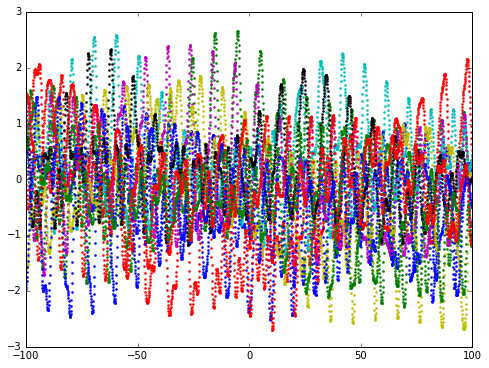

In [81]:
test_y = np.zeros((10, len(x)))

for k in range(10):
    test_y[k] = np.random.multivariate_normal(mean=np.zeros_like(x), cov=cov_x)
        
fig, ax = plt.subplots(1,1,figsize=(8,6))
for k in range(10):
    ax.plot(x, test_y[k],ls='None',marker='.',markersize=4)
plt.show()

In [82]:
#mean = [0, 0]
#cov = [[1,0], [0, 1]]  # diagonal covariance
#x, y = np.random.multivariate_normal(mean, cov, 5000).T
#plt.plot(x, y, 'x')
#plt.axis('equal')
#plt.show()

#  Run my attractor reconstruction analysis on a random draw from a GP ~ zero mean, squared exponential covariance.

In [83]:
logrArr = np.linspace(-4.,10.,50)
rArr = 2.**logrArr



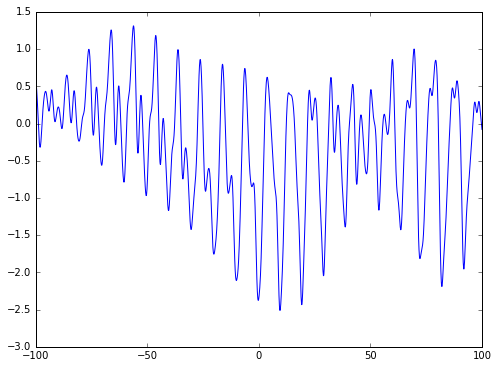

trial 0


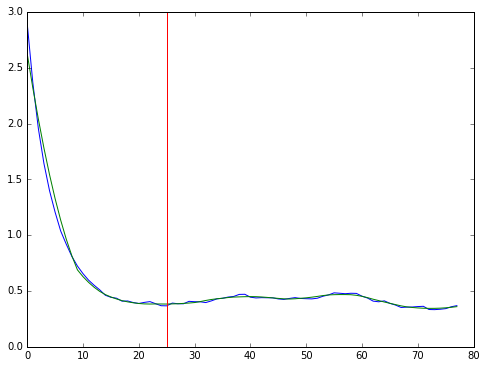

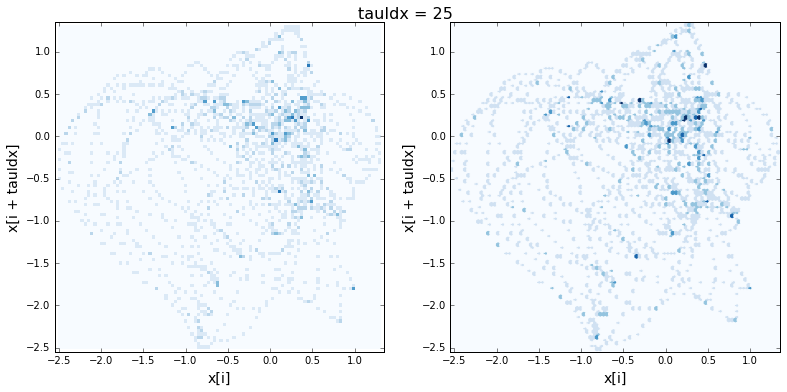

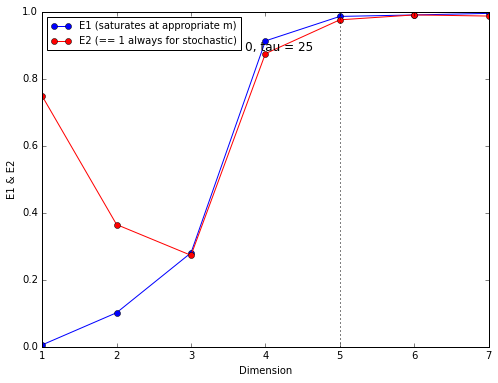


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1899
Maximal epsilon in the moment= 3.824607e+00



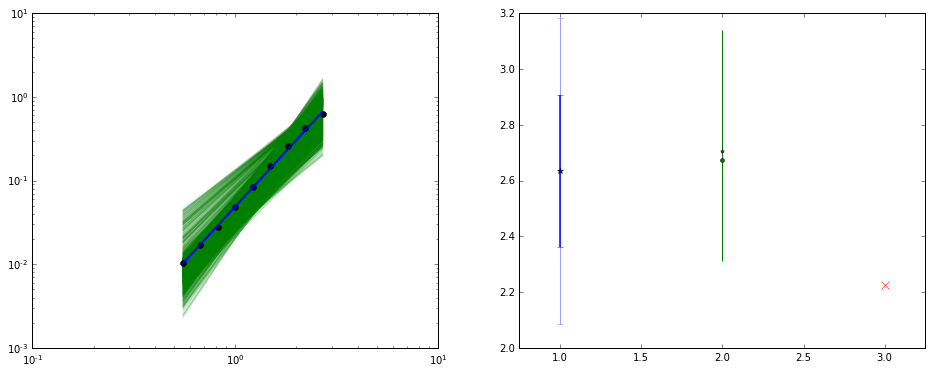

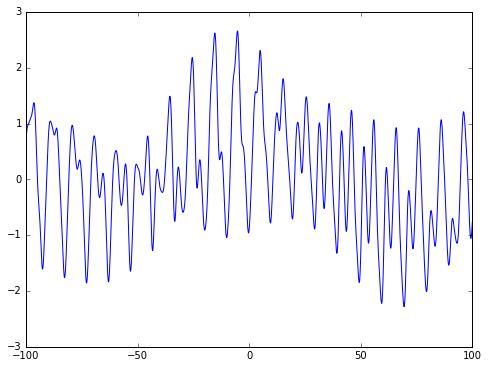

trial 1


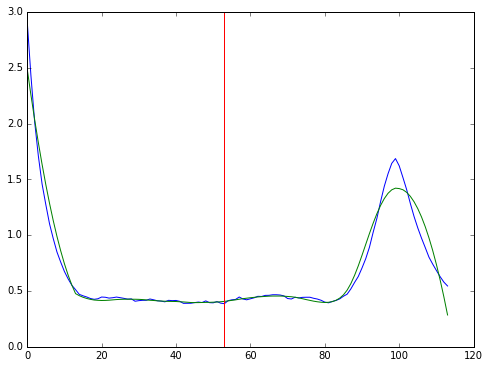

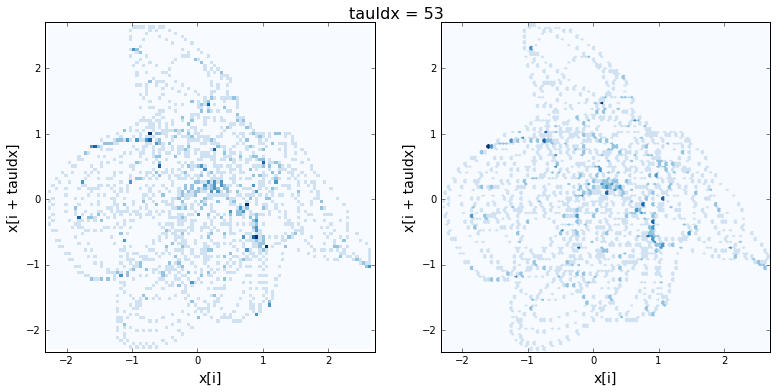

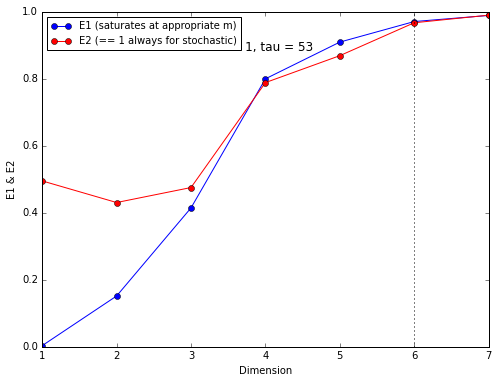


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1734
Maximal epsilon in the moment= 4.940100e+00



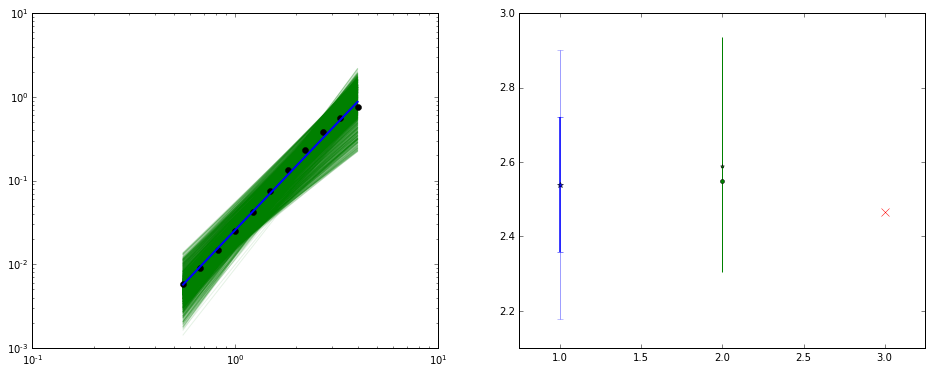

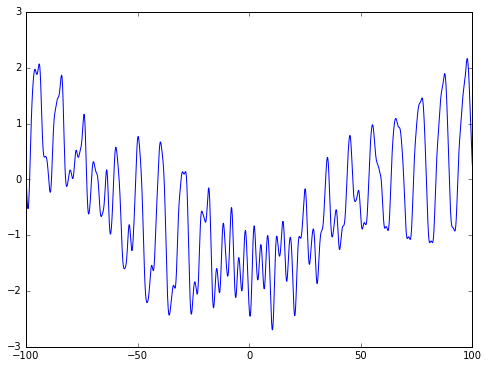

trial 2


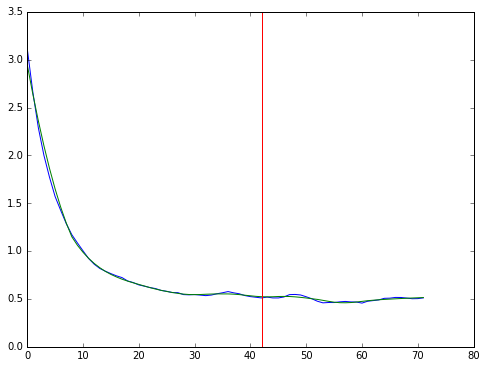

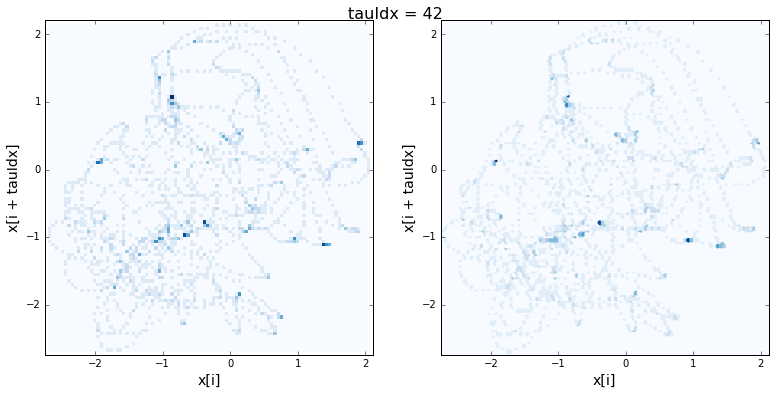

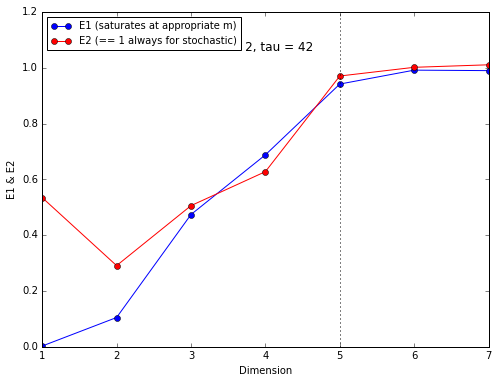


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1831
Maximal epsilon in the moment= 4.861318e+00



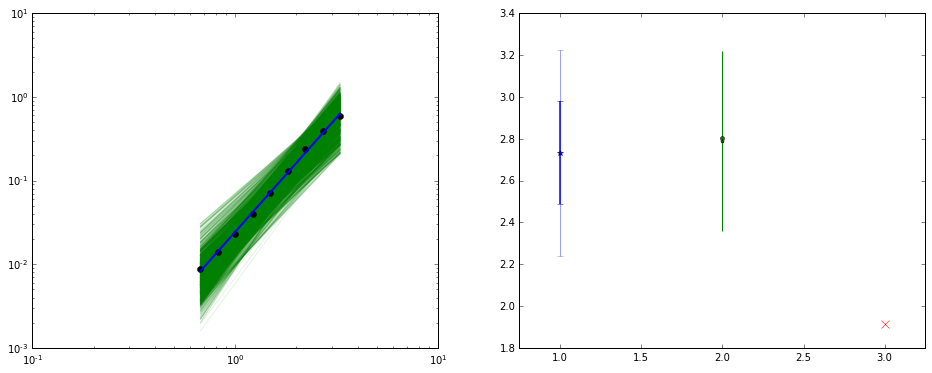

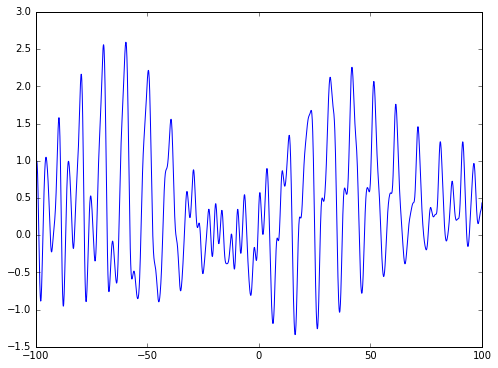

trial 3


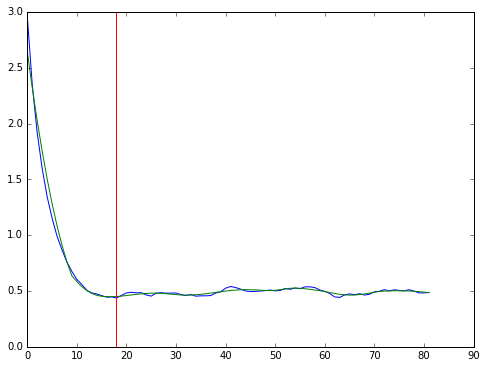

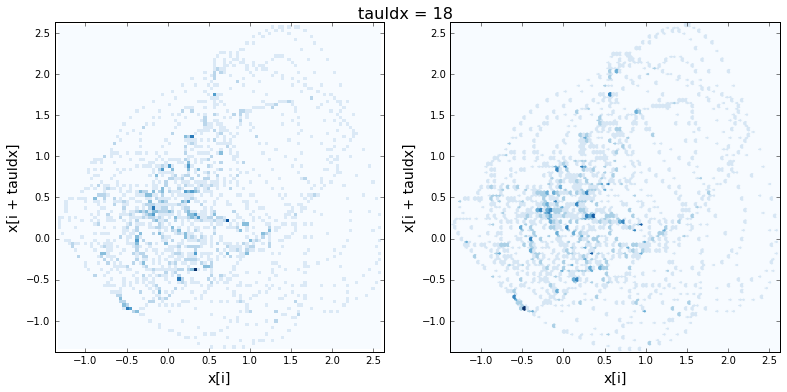

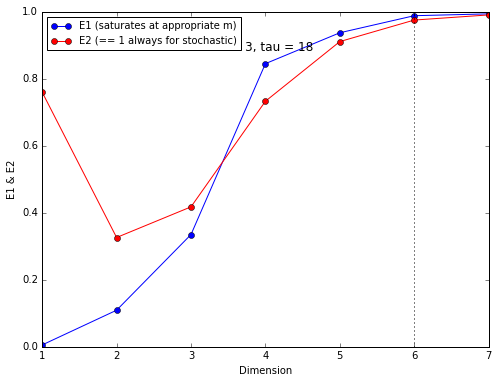


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1909
Maximal epsilon in the moment= 3.929662e+00



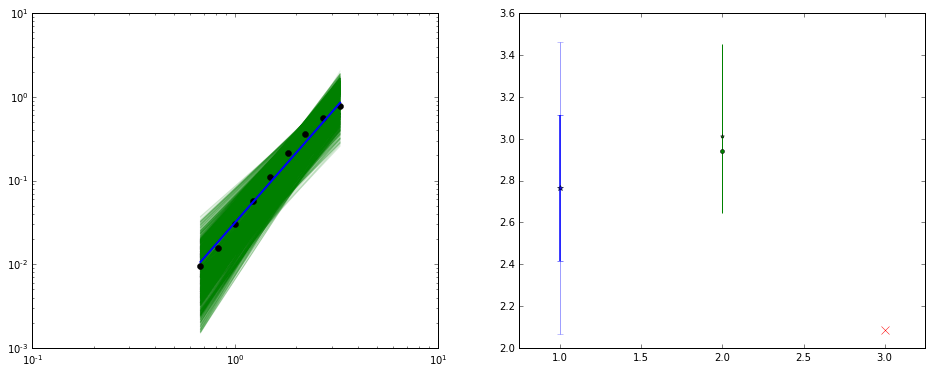

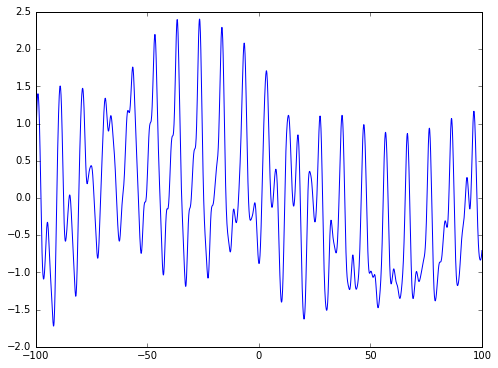

trial 4


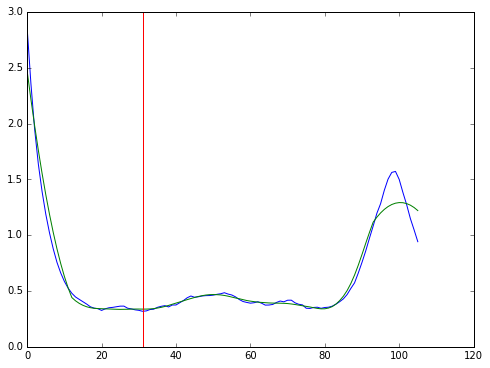

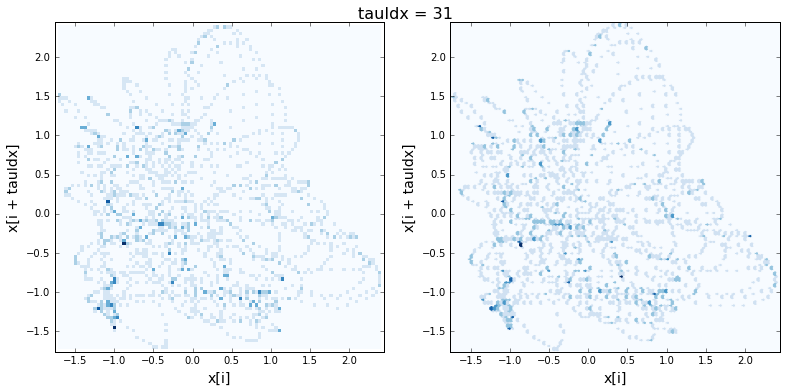

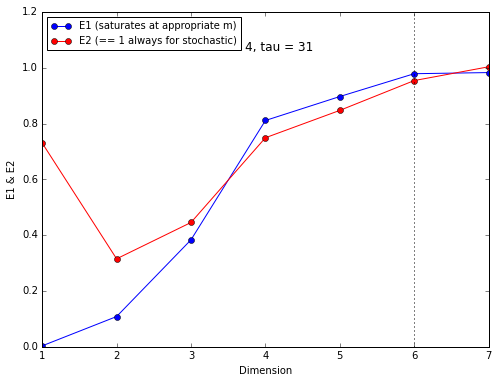


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1844
Maximal epsilon in the moment= 4.126228e+00



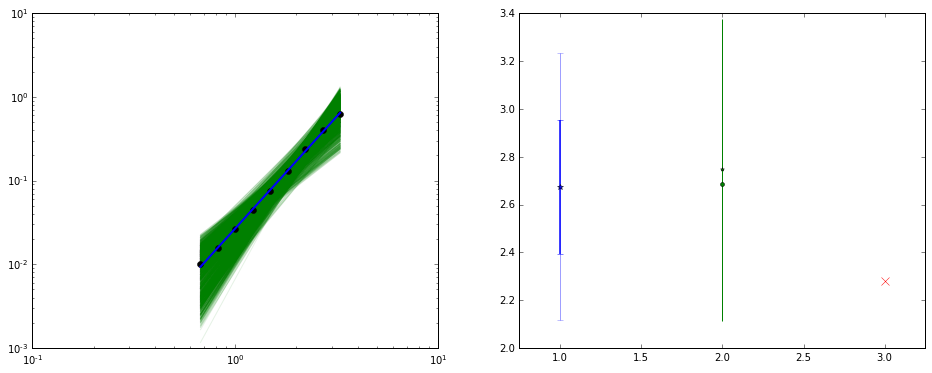

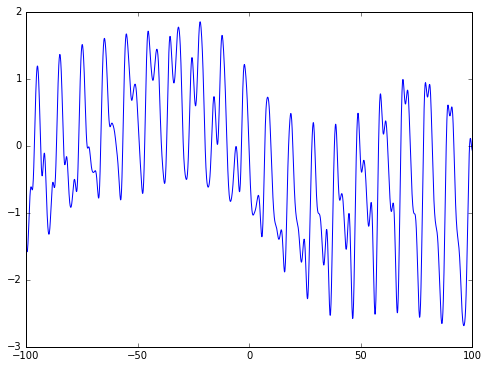

trial 5
something went wrong in FS86! returning global min of MI


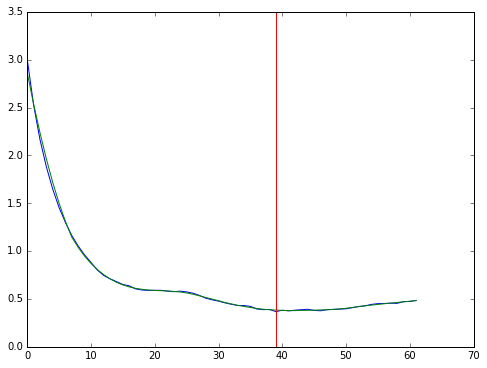

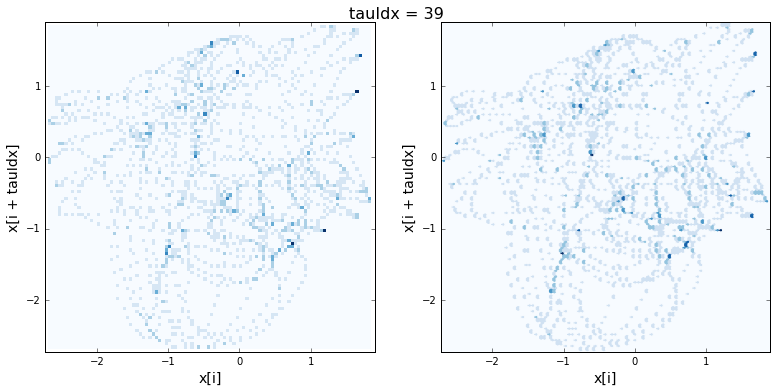

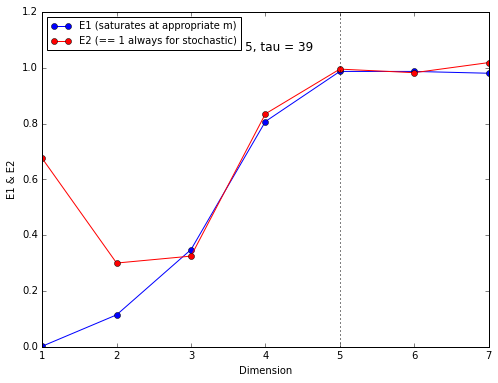


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1843
Maximal epsilon in the moment= 4.538500e+00



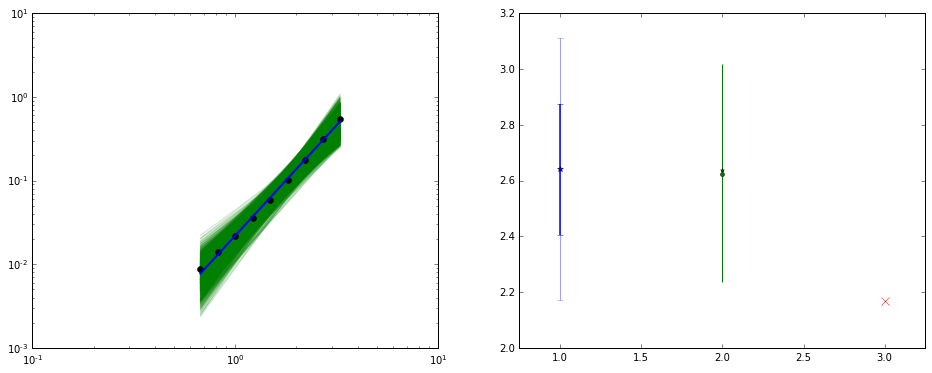

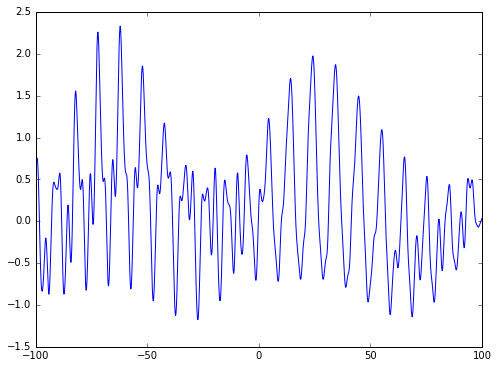

trial 6


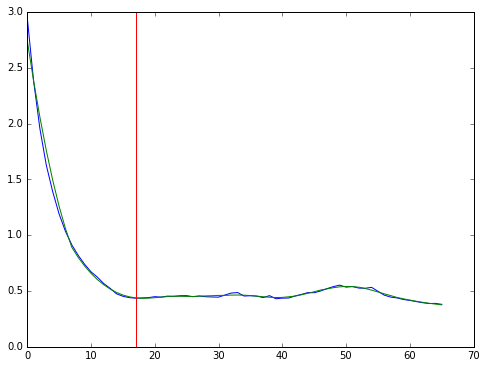

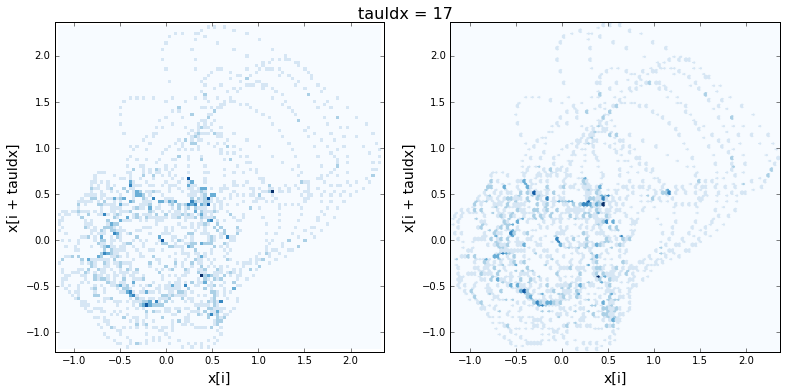

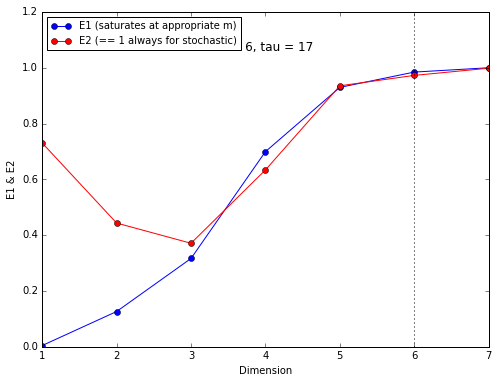


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1914
Maximal epsilon in the moment= 3.506550e+00



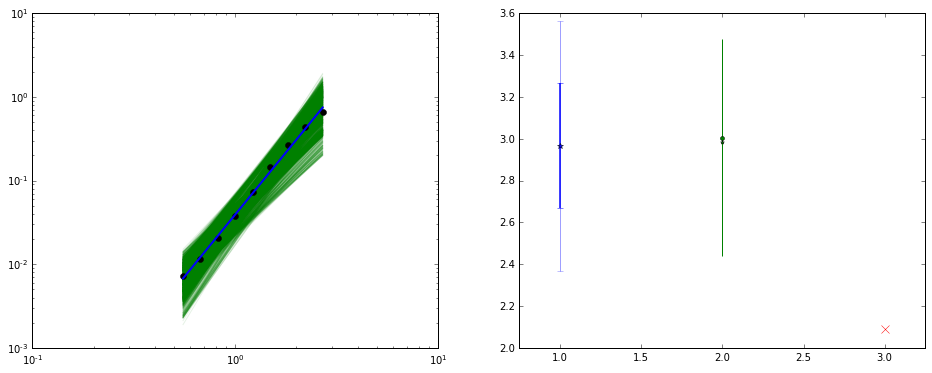

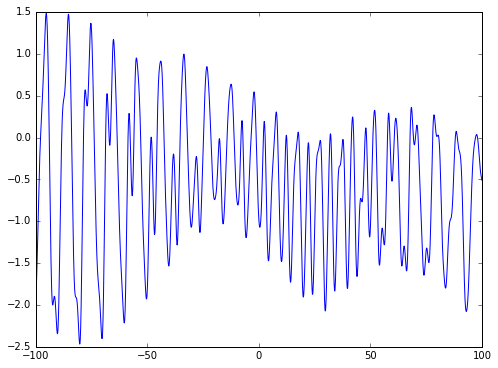

trial 7


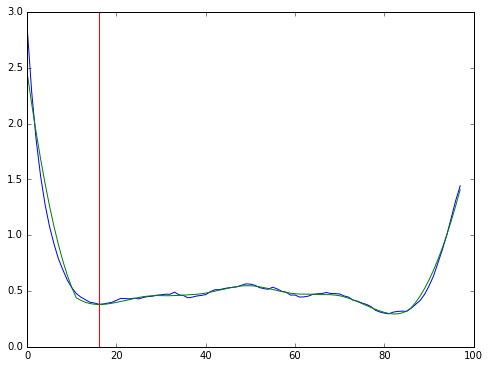

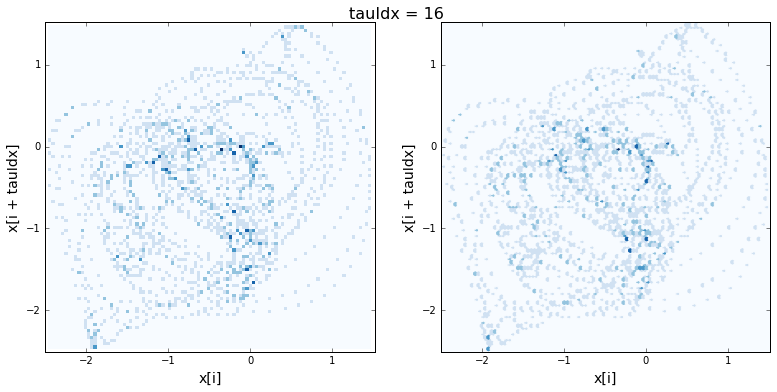

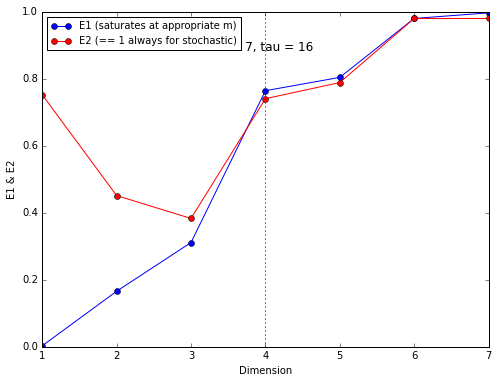


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1951
Maximal epsilon in the moment= 3.950368e+00



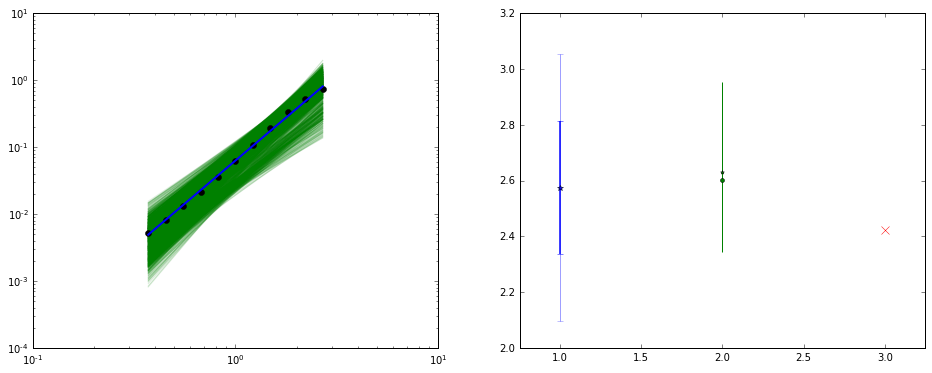

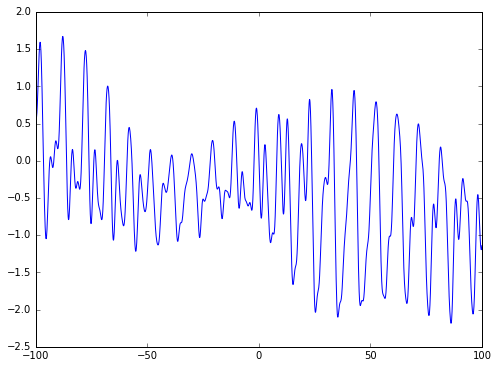

trial 8


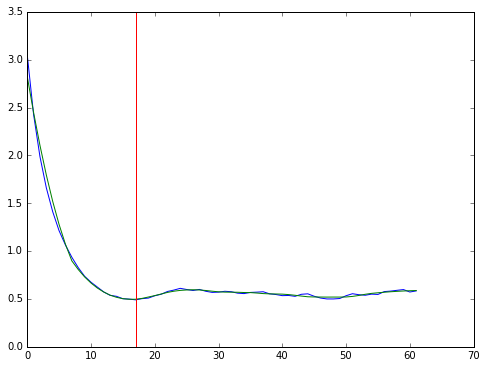

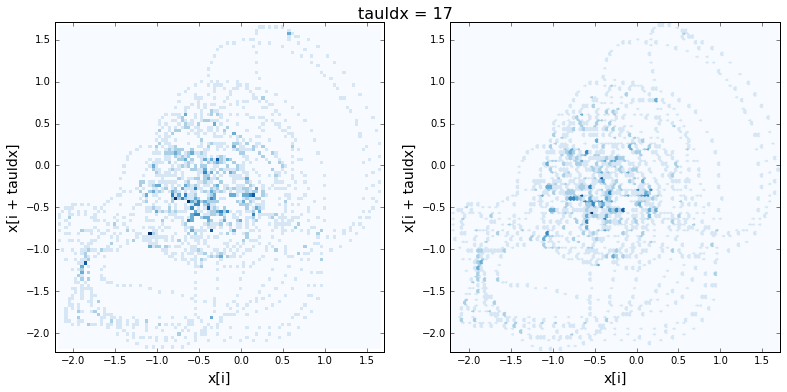

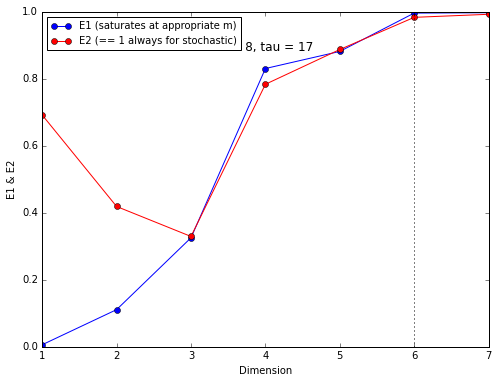


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1914
Maximal epsilon in the moment= 3.854319e+00



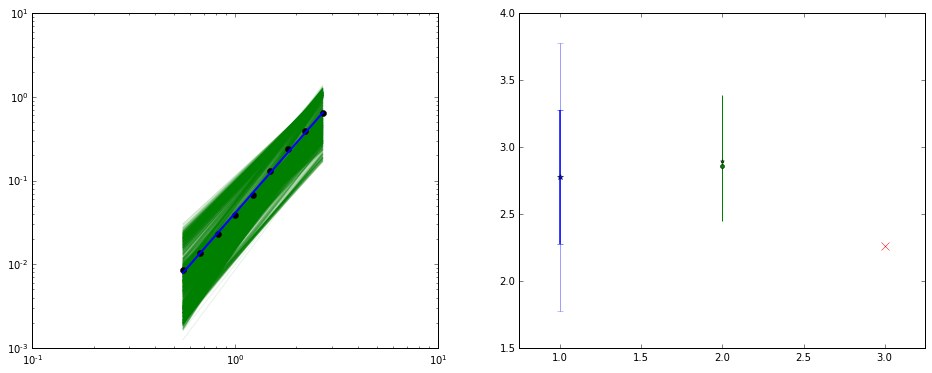

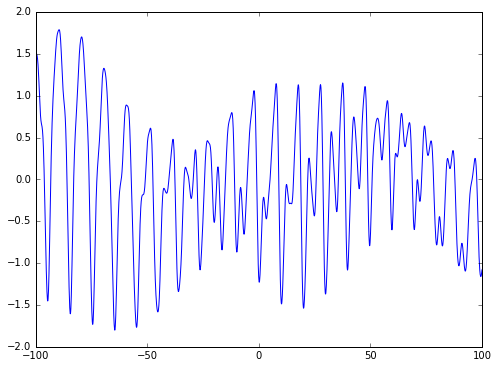

trial 9


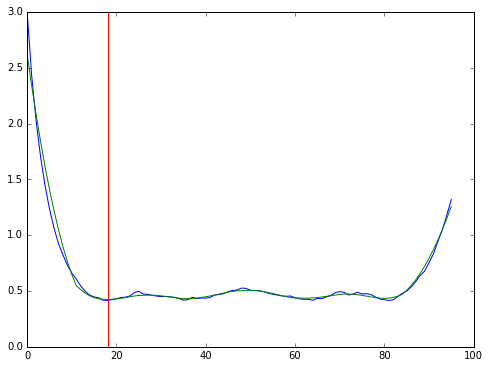

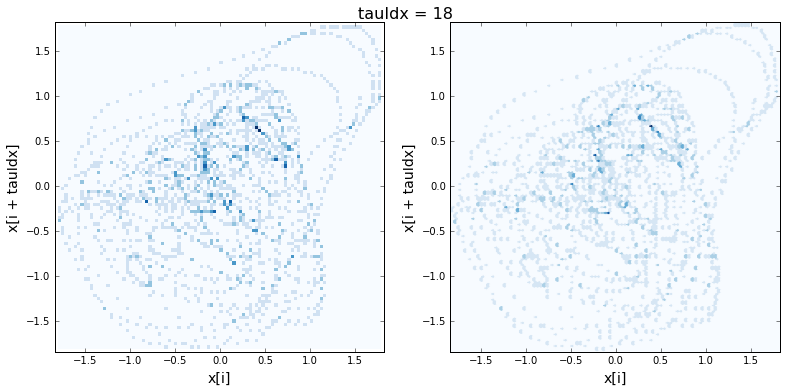

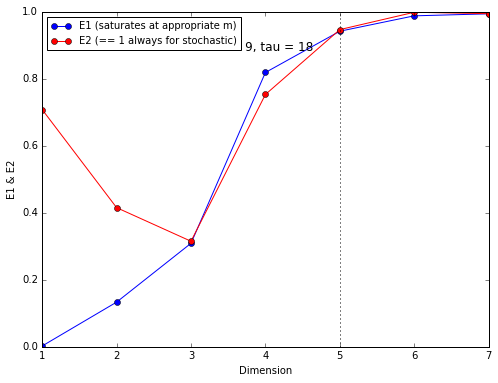


Additional non-data files were created
	Nonsilent mode chosen, displaying additional content:

File outFile.stat contains:
Center points treated so far= 1927
Maximal epsilon in the moment= 3.589694e+00



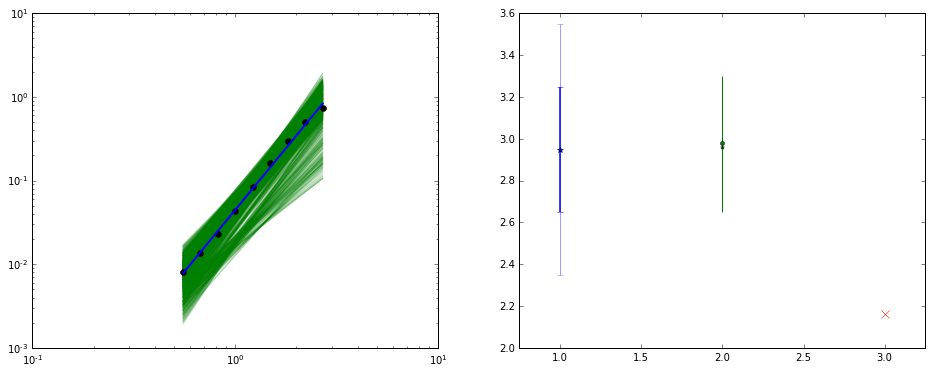

In [84]:
for k in range(10):
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.plot(x, test_y[k])
    plt.show()
    print("trial {0}".format(k))
    #qp = sp.estimateQuasiPeriod(x, test_y[k], plot=True)
    #print("qp is {0}".format(qp))
    MI, bestTau = sp.FS86(x, test_y[k], plot=True)
    #print("best tau = {0}".format(bestTau))
    
    E1, E2, sat_m = sp.cao97(timeSeries=test_y[k], tau=bestTau, mMax=8)
    
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.plot(np.arange(1,8),E1,'bo',ls='-',label="E1 (saturates at appropriate m)")
    ax.plot(np.arange(1,8),E2,'ro',ls='-',label="E2 (== 1 always for stochastic)")
    if sat_m is None:
        print("no saturation")
    else:
        ax.axvline(sat_m, color='k',linestyle=':')
    ax.set_title("test {0}, tau = {1}".format(k, bestTau))
    ax.set_xlabel('Dimension')
    ax.set_ylabel('E1 & E2')
    ax.legend(loc='best',fontsize=10)
    plt.show()
    
    C0, C1, C2, nArr = sp.Cq(rArr=rArr, timeSeries=test_y[k], tau = bestTau, m = sat_m)
    
    N = np.shape(nArr)[0]
    medians = np.percentile(nArr, 50, axis=0)
    
    params_C2, params_unc_C2 = sp.fitLinearRegime(rArr, nArr, C2)
    params_dist, params_dist_1sigma = sp.powerLawSlopeDistribution(rArr, nArr)
    d2_out, msg = tiseanio("d2", '-N', '0', '-M', '1,{0}'.format(sat_m), '-d', '{0}'.format(bestTau), "-V", "0", data=test_y[k])
    
    # need to figure out the Thelier window but just in the interest of getting the plotting code working:
    tisean_r_arr = d2_out["c2"][-78:-42,0][::-1]
    tisean_C2_arr = d2_out["c2"][-78:-42:,1][::-1]
    tisean_params, tisean_params_unc = sp.normal_equation(x=np.log10(tisean_r_arr), y=np.log10(tisean_C2_arr), yerr=np.ones_like(tisean_C2_arr), order=2)
    
    enoughNeighborsIdxs = np.arange(len(rArr))[medians > 10./N]
    firstGood = enoughNeighborsIdxs[0]
    
    # exclude values of r where any n(r) are NaN. The time series is not long enough to populate all the neighbors of the points.
    anyNans = [np.any(~np.isfinite(nArr[:,i])) for i in range(len(rArr))]
    anyNans = np.array(anyNans)
    nansIdxs = np.arange(len(rArr))[anyNans]
    lastGood = nansIdxs[0]
    
    fig, axes = plt.subplots(1,2,figsize=(16,6))
    for i in range(len(params_dist)):
        #ax.plot(rArr, nArr[i], 'k-', marker='None', lw=1, alpha=0.1)
        #ax.plot(rArr[firstGood:lastGood], nArr[i][firstGood:lastGood], 'k-', marker='None', lw=1, alpha=0.1)
        axes[0].plot(rArr[firstGood:lastGood], (10**params_dist[i][1])*rArr[firstGood:lastGood]**params_dist[i][0], 'g-', marker='None', lw=1, alpha=0.1)
    #ax.plot(rArr, C2, 'ko', ls="None")
    axes[0].plot(rArr[firstGood:lastGood], C2[firstGood:lastGood], 'ko', ls="None")
    axes[0].plot(rArr[firstGood:lastGood], (10**params_C2[1])*rArr[firstGood:lastGood]**params_C2[0], 'b-', marker='None', lw=2, alpha=1)
    axes[0].set_xscale("log")
    axes[0].set_yscale("log")
    
    
    axes[1].errorbar(1, params_C2[0], np.sqrt(params_unc_C2[0,0]), marker='*', color='b', elinewidth=1.5,alpha=1.,zorder=2)
    axes[1].errorbar(1, params_C2[0], 2*np.sqrt(params_unc_C2[0,0]), marker='None', color='b', elinewidth=0.75,alpha=0.5,zorder=1)
    
    p16 = np.percentile(params_dist[:,0],16)
    p50 = np.percentile(params_dist[:,0],50)
    v_mean = np.mean(params_dist[:,0])
    p84 = np.percentile(params_dist[:,0],84)
    
    #my C2 calculation from the v_i distribution
    axes[1].plot(2,p50, marker='o',ms=4,color='g',lw=1.,alpha=1,zorder=2)
    axes[1].plot(2,v_mean, marker='*',ms=4,color='g',lw=1.,alpha=1,zorder=2)
    axes[1].vlines(x=2, ymin=p16, ymax=p84, color='g',lw=1.,alpha=1,zorder=1)
    
    #TISEAN 
    axes[1].plot(3,tisean_params[0], marker='x',ms=8,color='r',lw=1.,alpha=1,zorder=2)
    axes[1].set_xlim(0.75,3.25)
    plt.show()

In [85]:
# tau deformation gif

In [99]:
#choose trial 7 because saturates at m=4
qp = sp.estimateQuasiPeriod(x, test_y[7], plot=False) # in units of test cadence, dt = 0.01

length = 400 * qp

MI, bestTau = sp.FS86(x, test_y[7], plot=False) #60

counter = 0

for tau in np.arange(1,len(MI),1):
#for tau in range(15,16,1):
    print(tau)
    delayMat = sp.delayMatrix(test_y[0],tau=tau,m=4)
    print(np.shape(delayMat))
    
    numViews = 10
    
    for a in np.arange(counter,counter+numViews,1):
        
        fig = plt.figure(figsize=(15,15))

        ax_true = fig.add_subplot(2,2,1,projection='3d')
        ax_x = fig.add_subplot(2,2,2,projection='3d')
        ax_MI_x = fig.add_axes(rect=(0.91,0.58,0.22,0.2225))
        ax_MI_y = fig.add_axes(rect=(-0.1,0.2025,0.22,0.2225))
        ax_y = fig.add_subplot(2,2,3,projection='3d')
        ax_z = fig.add_subplot(2,2,4,projection='3d')
        ax_MI_z = fig.add_axes(rect=(0.91,0.2025,0.22,0.2225))
        
        x_line = ax_x.plot3D(delayMat[:,0],delayMat[:,1],delayMat[:,2],color='k',lw=0.1,alpha=1)
        x_scatter = ax_x.scatter3D(delayMat[:,0],delayMat[:,1],delayMat[:,2],c=np.arange(len(delayMat[:,0])),s=5,edgecolor='None',cmap='magma_r',alpha=0.5)
        
        y_line = ax_y.plot3D(delayMat[:,0],delayMat[:,1],delayMat[:,3],color='k',lw=0.1,alpha=1)
        y_scatter = ax_y.scatter3D(delayMat[:,0],delayMat[:,1],delayMat[:,3],c=np.arange(len(delayMat[:,0])),s=5,edgecolor='None',cmap='magma_r',alpha=0.5)
        
        z_line = ax_z.plot3D(delayMat[:,0],delayMat[:,2],delayMat[:,3],color='k',lw=0.1,alpha=1)
        z_scatter = ax_z.scatter3D(delayMat[:,0],delayMat[:,2],delayMat[:,3],c=np.arange(len(delayMat[:,0])),s=5,edgecolor='None',cmap='magma_r',alpha=0.5)
        
        
        ax_MI_x.plot(np.arange(len(MI)), MI, 'k-')
        ax_MI_x.axvline(bestTau, color='k', linestyle=":")
        ax_MI_x.axvline(tau, ls="-", color="#f9564f",lw=1.5)
        x_ticks = np.arange(0,(5*qp)/4, qp/4)
        ax_MI_x.set_xticks(x_ticks)
        ax_MI_x.set_yticks([])
        ax_MI_x.set_xticklabels(np.around(x_ticks/qp, 2))
        ax_MI_x.set_xlabel(r"$\tau$ [cycles]",fontsize=14)
        ax_MI_x.set_ylabel(r"MI",fontsize=14)
    
        
        #print(a)
        for ax in [ax_true, ax_x, ax_y, ax_z]:    
            ax.view_init(elev=10., azim=a%360)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_zticks([])
            
            xmin,xmax = ax.get_xlim()
            ymin,ymax = ax.get_ylim()
            zmin,zmax = ax.get_zlim()
            
            ax.plot(np.linspace(xmin,xmax,3),np.zeros(3),np.zeros(3),'k',ls='-',lw=0.5)
            ax.plot(np.zeros(3),np.linspace(ymin,ymax,3),np.zeros(3),'k',ls='-',lw=0.5)
            ax.plot(np.zeros(3),np.zeros(3),np.linspace(zmin,zmax,3),'k',ls='-',lw=0.5)
            
        plt.rcParams['axes.titley'] = 0.87
        #ax_true.set_title("              ""True Lorenz",fontsize=16,loc="left")
        #ax_x.set_title("              "r"Reconstructed from x, $\tau={0}$ cycles""\n""              "r"[optimal $\tau={1}$ cycles]".format(np.round(tau/qp_x,2), np.round(bestTau_x/qp_x, 2)),fontsize=16,loc="left")
        #ax_y.set_title("              "r"Reconstructed from y, $\tau={0}$ cycles""\n""              "r"[optimal $\tau={1}$ cycles]".format(np.round(tau/qp_y,2), np.round(bestTau_y/qp_y, 2)),fontsize=16,loc="left")
        #ax_z.set_title("              "r"Reconstructed from z, $\tau={0}$ cycles""\n""              "r"[optimal $\tau={1}$ cycles]".format(np.round(tau/qp_z,2), np.round(bestTau_z/qp_z, 2)),fontsize=16,loc="left")
        
        plt.subplots_adjust(wspace=0.,hspace=0.)
        plt.savefig("../plots/gp1983implementation/GPtimeseries/tauDeformationGIF/{0}.jpg".format(str(int(a)).zfill(3)),dpi=100,bbox_inches="tight")
        plt.close()
    counter = a+1


1
(1997, 4)
2
(1994, 4)
3
(1991, 4)
4
(1988, 4)
5
(1985, 4)
6
(1982, 4)
7
(1979, 4)
8
(1976, 4)
9
(1973, 4)
10
(1970, 4)
11
(1967, 4)
12
(1964, 4)
13
(1961, 4)
14
(1958, 4)
15
(1955, 4)
16
(1952, 4)
17
(1949, 4)
18
(1946, 4)
19
(1943, 4)
20
(1940, 4)
21
(1937, 4)
22
(1934, 4)
23
(1931, 4)
24
(1928, 4)
25
(1925, 4)
26
(1922, 4)
27
(1919, 4)
28
(1916, 4)
29
(1913, 4)
30
(1910, 4)
31
(1907, 4)
32
(1904, 4)
33
(1901, 4)
34
(1898, 4)
35
(1895, 4)
36
(1892, 4)
37
(1889, 4)
38
(1886, 4)
39
(1883, 4)
40
(1880, 4)
41
(1877, 4)
42
(1874, 4)
43
(1871, 4)
44
(1868, 4)
45
(1865, 4)
46
(1862, 4)
47
(1859, 4)
48
(1856, 4)
49
(1853, 4)
50
(1850, 4)
51
(1847, 4)
52
(1844, 4)
53
(1841, 4)
54
(1838, 4)
55
(1835, 4)
56
(1832, 4)
57
(1829, 4)
58
(1826, 4)
59
(1823, 4)
60
(1820, 4)
61
(1817, 4)
62
(1814, 4)
63
(1811, 4)
64
(1808, 4)
65
(1805, 4)
66
(1802, 4)
67
(1799, 4)
68
(1796, 4)
69
(1793, 4)
70
(1790, 4)
71
(1787, 4)
72
(1784, 4)
73
(1781, 4)
74
(1778, 4)
75
(1775, 4)
76
(1772, 4)
77
(1769, 4)
78
(1766